<h1>Fast.ai's Machine Learning Course - Lesson 4<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-SGD-on-MNIST" data-toc-modified-id="Using-SGD-on-MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using SGD on MNIST</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#...-about-machine-learning-(a-reminder-from-lesson-1)" data-toc-modified-id="...-about-machine-learning-(a-reminder-from-lesson-1)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>... about machine learning (a reminder from lesson 1)</a></span></li><li><span><a href="#About-The-Data" data-toc-modified-id="About-The-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>About The Data</a></span></li></ul></li><li><span><a href="#Imports-and-data" data-toc-modified-id="Imports-and-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports and data</a></span><ul class="toc-item"><li><span><a href="#Normalize" data-toc-modified-id="Normalize-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Normalize</a></span></li><li><span><a href="#Look-at-the-data" data-toc-modified-id="Look-at-the-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Look at the data</a></span><ul class="toc-item"><li><span><a href="#Helper-methods" data-toc-modified-id="Helper-methods-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Helper methods</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Plots</a></span></li></ul></li></ul></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Functions,-parameters,-and-training" data-toc-modified-id="Functions,-parameters,-and-training-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Functions, parameters, and training</a></span></li><li><span><a href="#PyTorch" data-toc-modified-id="PyTorch-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PyTorch</a></span></li><li><span><a href="#About-GPUs" data-toc-modified-id="About-GPUs-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>About GPUs</a></span></li></ul></li><li><span><a href="#Neural-Net-for-Logistic-Regression-in-PyTorch" data-toc-modified-id="Neural-Net-for-Logistic-Regression-in-PyTorch-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Neural Net for Logistic Regression in PyTorch</a></span><ul class="toc-item"><li><span><a href="#Loss-functions-and-metrics" data-toc-modified-id="Loss-functions-and-metrics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Loss functions and metrics</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting the model</a></span></li></ul></li><li><span><a href="#Defining-Logistic-Regression-Ourselves" data-toc-modified-id="Defining-Logistic-Regression-Ourselves-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Defining Logistic Regression Ourselves</a></span></li><li><span><a href="#Aside-about-Broadcasting-and-Matrix-Multiplication" data-toc-modified-id="Aside-about-Broadcasting-and-Matrix-Multiplication-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aside about Broadcasting and Matrix Multiplication</a></span><ul class="toc-item"><li><span><a href="#Element-wise-operations" data-toc-modified-id="Element-wise-operations-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Element-wise operations</a></span></li><li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Broadcasting</a></span><ul class="toc-item"><li><span><a href="#Broadcasting-with-a-scalar" data-toc-modified-id="Broadcasting-with-a-scalar-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Broadcasting with a scalar</a></span></li><li><span><a href="#Broadcasting-a-vector-to-a-matrix" data-toc-modified-id="Broadcasting-a-vector-to-a-matrix-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Broadcasting a vector to a matrix</a></span></li><li><span><a href="#Broadcasting-Rules" data-toc-modified-id="Broadcasting-Rules-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Broadcasting Rules</a></span></li></ul></li><li><span><a href="#Matrix-Multiplication" data-toc-modified-id="Matrix-Multiplication-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Matrix Multiplication</a></span></li></ul></li><li><span><a href="#Writing-Our-Own-Training-Loop" data-toc-modified-id="Writing-Our-Own-Training-Loop-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Writing Our Own Training Loop</a></span><ul class="toc-item"><li><span><a href="#Put-it-all-together-in-a-training-loop" data-toc-modified-id="Put-it-all-together-in-a-training-loop-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Put it all together in a training loop</a></span></li></ul></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></div>

**Important: This notebook will only work with fastai-0.7.x. Do not try to run any fastai-1.x code from this path in the repository because it will load fastai-0.7.x**

> This is my revised and extended version of the first notebook from the [Fast.ai ML course (2018)](http://course18.fast.ai/ml). It covers lessons 1 and 2.

## Using SGD on MNIST

## Background

### ... about machine learning (a reminder from lesson 1)

The good news is that modern machine learning can be distilled down to a couple of key techniques that are of very wide applicability. Recent studies have shown that the vast majority of datasets can be best modeled with just two methods:

1. Ensembles of decision trees (i.e. Random Forests and Gradient Boosting Machines), mainly for structured data (such as you might find in a database table at most companies).  We looked at random forests in depth as we analyzed the Blue Book for Bulldozers dataset.

2. Multi-layered neural networks learnt with SGD (i.e. shallow and/or deep learning), mainly for unstructured data (such as audio, vision, and natural language)

In this lesson, we will start on the 2nd approach (a neural network with SGD) by analyzing the MNIST dataset.  You may be surprised to learn that **logistic regression is actually an example of a simple neural net**!

### About The Data

In this lesson, we will be working with MNIST, a classic data set of hand-written digits.  Solutions to this problem are used by banks to automatically recognize the amounts on checks, and by the postal service to automatically recognize zip codes on mail.

<img src="images/mnist.png" alt="" style="width: 60%"/>

A matrix can represent an image, by creating a grid where each entry corresponds to a different pixel.

<img src="images/digit.gif" alt="digit" style="width: 55%"/>
Source: [Adam Geitgey](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721)


## Imports and data

We will be using the fastai library. If you are accessing this course notebook, you probably already have it downloaded, as it is in the same Github repo as the course materials.

We use [symbolic links](https://kb.iu.edu/d/abbe) (often called *symlinks*) to make it possible to import these from your current directory.  For instance, I ran:

    ln -s ../../fastai
    
in the terminal, within the directory I'm working in, `home/fastai/courses/ml1`.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [3]:
path = 'data/mnist/'

Let's download, unzip, and format the data.

In [4]:
import os
os.makedirs(path, exist_ok=True)

In [5]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1') 

Pickle is for serialization/deserialization. Think of it as feather. Not optimal for big datasets though.

In [6]:
# fastai function to download the data
get_data(URL+FILENAME, path+FILENAME)

In [7]:
# data load (test to garbage)
((X_train, y_train), (X_valid, y_valid), _) = load_mnist(path+FILENAME)

In [8]:
type(X_train), X_train.shape, type(y_train), y_train.shape, y_valid.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,), (10000,))

In real life we'll get images, but in this dataset everything is prepared to proceed. What we could expect as "tensors of rank 2" or matrices (28x28), are in practice "tensors of rank 1" or arrays (1x784). One more thing about notation: axis 0 is the first dimension (rows) and axis 1 the second (columns); BUT in image world is Cols x Rows instead!

### Normalize

Many machine learning algorithms behave better when the data is *normalized*, that is when the mean is 0 and the standard deviation is 1. Deep Learning is one example. In RF we didn't have this problem, because the only thing that matters for RF is the order; is the same if values are normalized or not in order to build the trees, and the outliers were treated only as higher values. In Deep Learning we'll always have to normalize our data!

We will subtract off the mean and standard deviation from our training set in order to normalize the data:

In [9]:
mean = X_train.mean()
std = X_train.std()

X_train=(X_train-mean)/std
mean, std, X_train.mean(), X_train.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

Note that for consistency (with the parameters we learn when training), we subtract the mean and standard deviation of our training set from our validation set too (we won't calculate it again; must be the same).

In [10]:
X_valid = (X_valid-mean)/std
X_valid.mean(), X_valid.std()

(-0.005850922, 0.99243325)

### Look at the data

In any sort of data science work, it's important to look at your data, to make sure you understand the format, how it's stored, what type of values it holds, etc. To make it easier to work with, let's reshape it into 2d images from the flattened 1d format.

#### Helper methods

In [11]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

In [12]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

#### Plots 

In [13]:
X_valid.shape

(10000, 784)

We'll use Numpy's `reshape` function to change the 1-D representation of a digit into a 2-D one:

In [14]:
x_imgs = np.reshape(X_valid, (-1,28,28)) # -1 implies Numpy will figure out the first dimension size
x_imgs.shape

(10000, 28, 28)

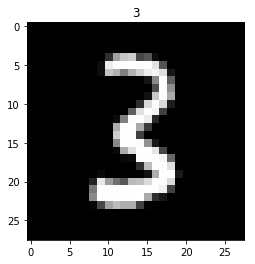

In [15]:
show(x_imgs[0], y_valid[0])

In [16]:
y_valid.shape

(10000,)

It's the digit 3!  And that's stored in the y value:

In [17]:
y_valid[0]

3

We can look at part of an image using slicing:

In [18]:
x_imgs[0,10:15,10:15] # image 0, rows 10 to 14, cols 10 to 14

array([[-0.42452, -0.42452, -0.42452, -0.42452,  0.17294],
       [-0.42452, -0.42452, -0.42452,  0.78312,  2.43567],
       [-0.42452, -0.27197,  1.20261,  2.77889,  2.80432],
       [-0.42452,  1.76194,  2.80432,  2.80432,  1.73651],
       [-0.42452,  2.20685,  2.80432,  2.80432,  0.40176]], dtype=float32)

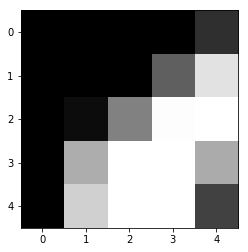

In [19]:
show(x_imgs[0,10:15,10:15])

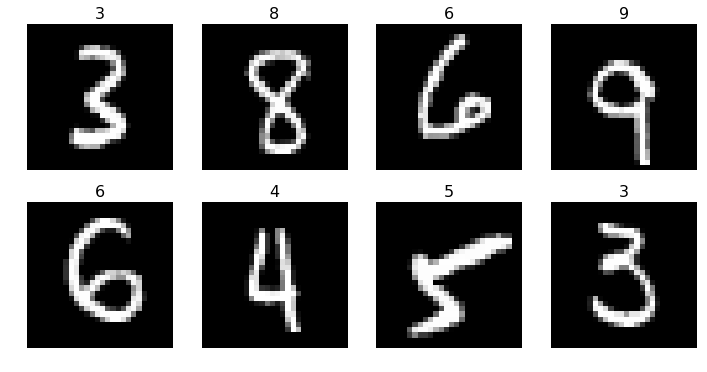

In [20]:
plots(x_imgs[:8], titles=y_valid[:8])

## Neural Networks

We will take a deep look *logistic regression* and how we can program it ourselves. We are going to treat it as a specific example of a shallow neural net.

**What is a neural network?**

A *neural network* is an *infinitely flexible function*, which [can approximate any other function](http://neuralnetworksanddeeplearning.com/chap4.html) (supports the Universal Approximation Theorem) by doing it large  enough. A neural network consists of *layers*.  A *layer* is a linear function such as matrix multiplication followed by a non-linear function (the *activation*).

One of the tricky parts of neural networks is just keeping track of all the vocabulary! 

### Functions, parameters, and training

A **function** takes inputs and returns outputs. For instance, $f(x) = 3x + 5$ is an example of a function.  If we input $2$, the output is $3\times 2 + 5 = 11$, or if we input $-1$, the output is $3\times -1 + 5 = 2$

Functions have **parameters**. The above function $f$ is $ax + b$, with parameters a and b set to $a=3$ and $b=5$.

Machine learning is often about learning the best values for those parameters.  For instance, suppose we have the data points on the chart below.  What values should we choose for $a$ and $b$?

<img src="images/sgd2.gif" alt="" style="width: 70%"/>

In the above gif from fast.ai's deep learning course, [intro to SGD notebook](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/sgd-intro.ipynb)), an algorithm called stochastic gradient descent is being used to learn the best parameters to fit the line to the data (note: in the gif, the algorithm is stopping before the absolute best parameters are found).  This process is called **training** or **fitting**.

Most datasets will not be well-represented by a line.  We could use a more complicated function, such as $g(x) = ax^2 + bx + c + \sin d$.  Now we have 4 parameters to learn: $a$, $b$, $c$, and $d$.  This function is more flexible than $f(x) = ax + b$ and will be able to accurately model more datasets.

Neural networks take this to an extreme, and are infinitely flexible.  They often have thousands, or even hundreds of thousands of parameters.  However the core idea is the same as above.  The neural network is a function, and we will learn the best parameters for modeling our data.

### PyTorch

We will be using the open source [deep learning library, fastai](https://github.com/fastai/fastai), which provides high level abstractions and best practices on top of PyTorch.  This is the highest level, simplest way to get started with deep learning. Please note that fastai requires Python 3 to function. It is currently in pre-alpha, so items may move around and more documentation will be added in the future.

The fastai deep learning library uses [PyTorch](http://pytorch.org/), a Python framework for dynamic neural networks with GPU acceleration, which was released by Facebook's AI team.

PyTorch has two overlapping, yet distinct, purposes.  As described in the [PyTorch documentation](http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html):

<img src="images/what_is_pytorch.png" alt="pytorch" style="width: 80%"/>

The neural network functionality of PyTorch is built on top of the Numpy-like functionality for fast matrix computations on a GPU. Although the neural network purpose receives way more attention, both are very useful. As we need to know in which direction and how much the parameters might me modified, we need to work with the derivatives of functions; that's something PyTorch is giving us solved too :)

We'll implement a neural net from scratch today using PyTorch.

**Further learning**: If you are curious to learn what *dynamic* neural networks are, you may want to watch [this talk](https://www.youtube.com/watch?v=Z15cBAuY7Sc) by Soumith Chintala, Facebook AI researcher and core PyTorch contributor.

If you want to learn more PyTorch, you can try this [introductory tutorial](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) or this [tutorial to learn by examples](http://pytorch.org/tutorials/beginner/pytorch_with_examples.html).

### About GPUs

Graphical processing units (GPUs) allow for matrix computations (linear algebra in general) to be done with much greater speed, as long as you have a library such as PyTorch that takes advantage of them.  Advances in GPU technology in the last 10-20 years have been a key part of why neural networks are proving so much more powerful now than they did a few decades ago. 

You may own a computer that has a GPU which can be used.  For the many people that either don't have a GPU (or have a GPU which can't be easily accessed by Python), there are a few differnt options:

- **Don't use a GPU**: For the sake of this tutorial, you don't have to use a GPU, although some computations will be slower.
- **Use crestle, through your browser**: [Crestle](https://www.crestle.com/) is a service that gives you an already set up cloud service with all the popular scientific and deep learning frameworks already pre-installed and configured to run on a GPU in the cloud. It is easily accessed through your browser. New users get 10 hours and 1 GB of storage for free. After this, GPU usage is 34 cents per hour. I recommend this option to those who are new to AWS or new to using the console.
- **Set up an AWS instance through your console**: You can create an AWS instance with a GPU by following the steps in this  [fast.ai setup lesson](http://course.fast.ai/lessons/aws.html).]  AWS charges 90 cents per hour for this.

## Neural Net for Logistic Regression in PyTorch

Top-down approach as always. We'll start assuming a lot of things, and gradually we'll dig into each piece, and even rewrite fastai or pytorch functions.

In [21]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn # PyTorck Neural Nets library

To know if PyTorch is using the GPU:

In [22]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060'

You can see its performance by running the same command in your terminal while running the fit:
`nvidia-smi dmon`

We will begin with the highest level abstraction: using a neural net defined by PyTorch's Sequential class (we have to define a sequence of layers).  

In [23]:
# 2-layer version (no hidden layers)
net = nn.Sequential(
    nn.Linear(28*28, 10),
    nn.LogSoftmax()
).cuda()

In [24]:
# 6-layer version
net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

Each input is a vector of size `28*28` pixels and our output is of size `10` (since there are 10 digits: from 0 to 9). 

We see several things there:
* `Linear()`: to define a linear operation (a matrix product plus a bias vector, basically)
* `ReLU()`: non-linear operation (rectified linear unit) to change negative values to zero
* `LogSoftMax()`: non-linear operation to transform the outputs into probabilities summing 1
* `cuda()`: we're telling PyTorch to copy the NN over the GPU, so it's executed there from now on.

There're 6 layers in total. We may also think in the input as a kind of layer. We'd use only `nn.Linear(28*28, 10)` to imitate a logistic regression.

We use the output of the final layer to generate our predictions.  Often for classification problems (like MNIST digit classification), the final layer has the same number of outputs as there are classes.  In that case, this is 10: one for each digit from 0 to 9.  These can be converted to comparative probabilities.  For instance, it may be determined that a particular hand-written image is 80% likely to be a 4, 18% likely to be a 9, and 2% likely to be a 3.

Fastai has a concept of *Model Data*, which is basically something that wraps up training and validation data (and optionally test data). The path is where temp files will be located. This function creates a PyTorch data loader for us, from where we can get a mini-batch of images each time (it's like a Python generator).

In [25]:
md = ImageClassifierData.from_arrays(path, (X_train, y_train), (X_valid, y_valid))

Now we're telling what loss function (criterion) we wanna use, what optimizer, etc etc.

In [26]:
loss=nn.NLLLoss()
metrics=[accuracy]
# opt=optim.Adam(net.parameters())
# opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

### Loss functions and metrics

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1. So one of the two terms will be 0, and the other one could be 0 if our prediction was 100% confident.

Let's see an example:

In [27]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [28]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss is should be much larger.

`loss = -log(1-0.9) = 2.30`

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.

For multi-class classification, we use **negative log likelihood** (also known as *categorical cross entropy*) which is exactly the same thing as binary cross entropy, but summed up over all classes. Think of the output as a vector of N probabilities; one for each class (so the actual prediction is the class with higher probability).

### Fitting the model

*Fitting* is the process by which the neural net learns the best parameters for modelling the dataset, so the new samples could be recognized.

With the fastai's `fit` function we are telling: fit the neural network *net* to this *md* data, going over every image 5 times, using this loss function, this optimizer, and print out these metrics.

In [29]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.254559   0.193516   0.9459    
    1      0.232797   0.20824    0.944                                                                                 
    2      0.232001   0.16945    0.952                                                                                 
    3      0.192597   0.159466   0.9557                                                                                
    4      0.204885   0.157998   0.9572                                                                                



[0.15799812989234924, 0.9572]

In [30]:
set_lrs(opt, 1e-2)

In [31]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.079483   0.088018   0.9744    
    1      0.065094   0.079916   0.9763                                                                                
    2      0.060039   0.077372   0.9764                                                                                



[0.07737184524536132, 0.9764]

In [32]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.04842    0.07211    0.9788    
    1      0.040573   0.070933   0.9787                                                                                
    2      0.040281   0.071359   0.9787                                                                                
    3      0.039663   0.069744   0.9799                                                                                
    4      0.034318   0.072265   0.9787                                                                                



[0.07226482408046722, 0.9787]

In [33]:
set_lrs(opt, 1e-2)

In [34]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.037229   0.066757   0.9804    
    1      0.033065   0.069524   0.9792                                                                                
    2      0.0321     0.06645    0.9809                                                                                



[0.06644964735507965, 0.9809]

In [35]:
t = [o.numel() for o in net.parameters()]
t, sum(t)

([78400, 100, 10000, 100, 1000, 10], 89610)

GPUs are great at handling lots of data at once (otherwise don't get performance benefit).  We break the data up into **batches**, and that specifies how many samples from our dataset we want to send to the GPU at a time.  The fastai library defaults to a batch size of 64.  On each iteration of the training loop, the error on 1 batch of data will be calculated, and the optimizer will update the parameters based on that.

An **epoch** is completed once each data sample has been used once in the training loop.

Now that we have the parameters for our model, we can make predictions on our validation set.

In [36]:
preds = predict(net, md.val_dl)

In [37]:
preds.shape

(10000, 10)

**Question**: Why does our output have length 10 (for each image)?

We'll get the predicted number using `argmax` to find the index for the class with higher probability:

In [38]:
preds.argmax(axis=1)[:5]

array([3, 8, 6, 9, 6], dtype=int64)

In [39]:
preds = preds.argmax(1)

Let's check how accurate this approach is on our validation set (we got the accuracy in the metrics before!). You may want to compare this against other implementations of logistic regression, such as the one in sklearn. In our testing, this simple pytorch version is faster and more accurate for this problem!

In [40]:
np.mean(preds == y_valid)

0.9809

Let's see how some of our predictions look!

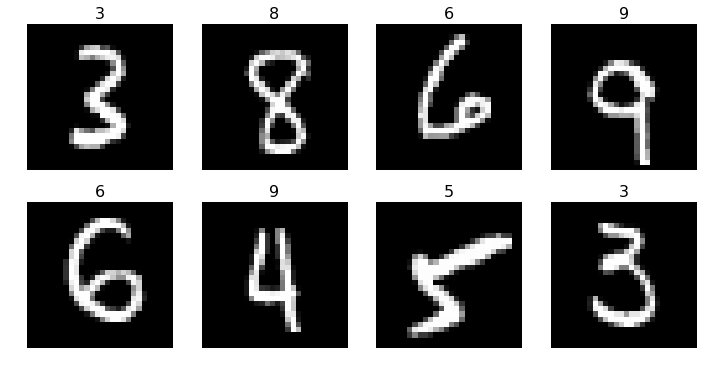

In [41]:
plots(x_imgs[:8], titles=preds[:8])

## Defining Logistic Regression Ourselves

Above, we used pytorch's `nn.Linear` to create a linear layer. What we’re going to do is dig in a layer deeper and define logistic regression without using `nn.Sequential`, `nn.Linear`, or `nn.LogSoftmax`. We'll write our own class!

A linear operation is defined by a matrix multiplication and then an addition (these are also called `affine transformations`). Let's try defining this ourselves.

Note: just as Numpy has `np.matmul` for matrix multiplication (in Python 3, this is equivalent to the `@` operator), PyTorch has `torch.matmul`.  

To define a neural net or a layer (take note: every neural net can be part of another neural net), we need to create a PyTorch module: a class extending `nn.Module`. Our class needs two things: a constructor (to say what the parameters are) and a forward method (how to calculate a prediction using those parameters). The method `forward` describes how the neural net converts inputs to outputs.

In PyTorch, the optimizer tries to optimize any attribute of type `Parameter`.

We need to initialize the weights and the bias values. We'd like to avoid the *gradient explosion*: a phenomenon taking place when the weights in the linear part of a layer are large or small, so the sequential matrix multiplications could make the result too large or too small. We'd like to preserve as much as possible the mean and the standard deviation of the inputs, so we'll divide the randon numbers by the number of elements in the axis 0. Read more about initialization [here](https://www.jefkine.com/deep/2016/08/08/initialization-of-deep-networks-case-of-rectifiers/). See an example:

In [42]:
ex_in = torch.randn(28, 1000)
ex_w = (torch.randn(1000, 4)/1000) # Add .cuda() to use GPU!
print(torch.mean(ex_w), torch.std(ex_w))
ex_out = (ex_in @ ex_w).cuda()
print(torch.mean(ex_out), torch.std(ex_out), ex_out.shape, )

tensor(-7.8924e-06) tensor(0.0010)
tensor(-0.0007, device='cuda:0') tensor(0.0293, device='cuda:0') torch.Size([28, 4])


Now let's write our code! (for CPU; you can use GPU, but do it everywhere!)

In [43]:
def get_weights(*dims): 
    return nn.Parameter(torch.randn(dims)/dims[0]) # divided by dims[0] to avoid the gradient explosion

def softmax(x): 
    return torch.exp(x)/(torch.exp(x).sum(dim=1)[:,None])

class LogReg(nn.Module):
    def __init__(self):
        super().__init__()                  # init the superclass
        self.l1_w = get_weights(28*28, 10)  # Init Layer 1 (multiplication matrix) w/ random weights => ax + ...
        self.l1_b = get_weights(10)         # Init Layer 2 (bias vector) w/ random values too => b

    def forward(self, x):
        x = x.view(x.size(0), -1)           # reshape is 'view' in pytorch. Flatten input, holding the num of images
        x = (x @ self.l1_w) + self.l1_b     # Linear Layer, using the python matrix multiplication operator (@) 
        x = torch.log(softmax(x))           # Non-linear Layer - LogSoftmax as the activation function
                                            # = torch.exp(x)/(torch.exp(x).sum(dim=0))
                                            # Why? we want the sum of probabilities for each class is 1
        return x

![image](https://www.cntk.ai/jup/cntk103b_MNIST_LR.png)
(Source: https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html)

We instantiate our neural net and create the optimizer.  (We will use the same loss and metrics from above).

In [44]:
net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters()) # parameters() return everything we defined as Parameter.

We train the neural net:

In [45]:
fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.311135   0.286389   0.9208    



[0.2863894017100334, 0.9208]

We get the same accuracy as we obtained before, so our implementation was right!

Now we use the mini-batch consuming option from the PyTorch's data loader (wrapped by the Model Data). So we iterate through the training data loader mini batches this way:

In [46]:
dl = iter(md.trn_dl) # creates the iterator from the training data loader

In [47]:
xmb,ymb = next(dl) # consumes a mini batch
# to iterate: for xmb, ymb in dl: ...

In [48]:
vxmb = Variable(xmb.cuda()) # copy that into GPU, where we have our model, and pass it through Variable,
                            # so we have automatic differentiation (derivación matricial) available! (PyTorch
                            # keeps track of each operation done to our variable, so differentiation is automatic)
                            # Necessary to calculate the gradient and calculate/update the weights
vxmb

tensor([[-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        ...,
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245]],
       device='cuda:0')

And we do our predictions for the mini batch:

In [49]:
preds = net2(vxmb).exp() # that's how we invoke the forward method from the outside. 
                         # The exp() is to revert the log of softmax, to get the probabilities summing 1
print(preds.shape)
preds[:3]

torch.Size([64, 10])


tensor([[9.9743e-01, 1.9168e-10, 6.3178e-07, 5.9860e-06, 2.3914e-07, 2.4292e-03,
         9.4082e-06, 6.2956e-07, 1.2423e-04, 1.5927e-07],
        [2.4949e-05, 1.5688e-05, 2.8792e-05, 9.9737e-01, 7.7015e-06, 2.3532e-03,
         3.5159e-07, 2.9107e-06, 1.9998e-04, 5.3593e-07],
        [3.9338e-04, 2.1051e-06, 1.4592e-01, 7.3684e-01, 2.8102e-05, 7.1949e-04,
         2.0711e-04, 1.1550e-01, 1.1148e-05, 3.7372e-04]], device='cuda:0',
       grad_fn=<SliceBackward>)

We translate it into numbers :D

In [50]:
preds = preds.data.max(1)[1] # the equivalent to Python's argmax in PyTorch. 
                             # (1): the axis; max: [1] contains the predicted number, [0] the max value for column
preds

tensor([0, 3, 3, 3, 2, 8, 9, 2, 5, 5, 0, 9, 7, 1, 5, 2, 8, 9, 1, 9, 9, 5, 4, 7,
        4, 8, 8, 9, 9, 8, 0, 6, 8, 0, 9, 7, 1, 6, 3, 6, 4, 8, 5, 4, 2, 3, 7, 9,
        1, 8, 9, 2, 4, 0, 8, 8, 9, 3, 9, 9, 2, 1, 4, 1], device='cuda:0')

Let's look at our predictions on the first eight images:

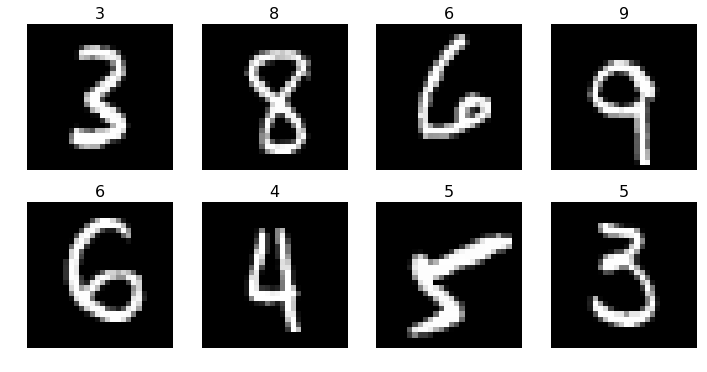

In [51]:
preds = predict(net2, md.val_dl).argmax(1)
plots(x_imgs[:8], titles=preds[:8])

We calculate the accuracy to test our implementation is right:

In [52]:
np.mean(preds == y_valid)

0.9208

So it is :)

## Aside about Broadcasting and Matrix Multiplication

Now let's dig in to what we were doing with `torch.matmul`: matrix multiplication. First, let's start with a simpler building block (and maybe the most important operation in ML): **broadcasting**.

### Element-wise operations 

Broadcasting and element-wise operations are supported in the same way by both numpy and pytorch.

Operators (+,-,\*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

In [53]:
a = np.array([10, 6, -4])
b = np.array([2, 8, 7])
a,b

(array([10,  6, -4]), array([2, 8, 7]))

In [54]:
%timeit a + b

489 ns ± 23.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [55]:
(a < b)

array([False,  True,  True])

In [56]:
a = T([10, 6, -4]).cuda() # T for Tensor!
b = T([2, 8, 7]).cuda()
a,b

(tensor([10,  6, -4], device='cuda:0'), tensor([2, 8, 7], device='cuda:0'))

In [57]:
%timeit a + b

60.2 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [58]:
#t_cpu = torch.rand(500,500,500)
#%timeit t_cpu @ t_cpu

In [59]:
#t_gpu = torch.rand(500,500,500).cuda()
#%timeit t_gpu @ t_gpu

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy, although is now used in other libraries such as [Tensorflow](https://www.tensorflow.org/performance/xla/broadcasting) and Matlab; the rules can vary by library.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

#### Broadcasting with a scalar

Note: a scalar is also known as a rank 0 tensor. The rank 1 tensor is also known as a vector.

In [60]:
a

tensor([10,  6, -4], device='cuda:0')

In [61]:
a > 0

tensor([1, 1, 0], device='cuda:0', dtype=torch.uint8)

How are we able to do a > 0?  0 is being **broadcasted** to have the same dimensions as a. It's only a simulation; the broadcasted part is not copied into memory.

Remember above when we normalized our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar)?  We were using broadcasting!

Other examples of broadcasting with a scalar:

In [62]:
a + 1

tensor([11,  7, -3], device='cuda:0')

In [63]:
m = np.array([[1, 2, 3], [4,5,6], [7,8,9]]); m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [64]:
2*m

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [65]:
c = np.array([10,20,30]); c

array([10, 20, 30])

In [66]:
m + c

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [67]:
c + m

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

Although numpy does this automatically, you can also use the `broadcast_to` method:

In [68]:
np.broadcast_to(np.expand_dims(c,0), (3,3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [69]:
np.broadcast_to(c, m.shape)

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [70]:
c.shape

(3,)

Broadcasting through the other dimension:

In [71]:
np.broadcast_to(c[:,None], m.shape)

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

*None* in there creates a new dimension:

In [72]:
c[:,None]

array([[10],
       [20],
       [30]])

The numpy `expand_dims` method lets us convert the 1-dimensional array `c` into a 2-dimensional array (although one of those dimensions has value 1).

In [73]:
np.expand_dims(c,0)

array([[10, 20, 30]])

In [74]:
np.expand_dims(c,0).shape

(1, 3)

In [75]:
m + np.expand_dims(c,0)

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

To convert a vector (1x3) into a rank 2 tensor (3x1), so the broadcasting because of the sum with the matrix is done in the other dimension:

In [76]:
np.expand_dims(c,1)

array([[10],
       [20],
       [30]])

In [77]:
c[:, None] # easier

array([[10],
       [20],
       [30]])

In [78]:
m + np.expand_dims(c,1)

array([[11, 12, 13],
       [24, 25, 26],
       [37, 38, 39]])

In [79]:
np.broadcast_to(np.expand_dims(c,1), (3,3))

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

#### Broadcasting Rules

In [80]:
c[None] # c[None,:]

array([[10, 20, 30]])

In [81]:
c[:,None]

array([[10],
       [20],
       [30]])

In [82]:
c[None] * c[:,None] # same as c[:,None] * c[None]

array([[100, 200, 300],
       [200, 400, 600],
       [300, 600, 900]])

In [83]:
c[None] > c[:,None]

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

A practical example of creating a grid:

In [84]:
xg,yg = np.ogrid[0:5, 0:5]
xg,yg

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [85]:
xg+yg

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

When operating on two arrays, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1

Arrays do not need to have the same number of dimensions. For example, if you have an image, represented by a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array): (1)   (1)   3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

This is something we'll use a lot in machine learning!!!

### Matrix Multiplication

We are going to use broadcasting to define matrix multiplication; we'll do faster operations and use less memory! The operator for this is `@`.

In [86]:
m, c

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), array([10, 20, 30]))

In [87]:
m @ c  # np.matmul(m, c)

array([140, 320, 500])

We get the same answer using `torch.matmul`:

In [88]:
(torch.from_numpy(m) @ torch.from_numpy(c)).cuda()
#torch.matmul(torch.from_numpy(m), torch.from_numpy(c))

tensor([140, 320, 500], device='cuda:0', dtype=torch.int32)

The following is **NOT** matrix multiplication.  What is it? (element wise product with broadcasting)

In [89]:
m,c

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), array([10, 20, 30]))

In [90]:
m * c

array([[ 10,  40,  90],
       [ 40, 100, 180],
       [ 70, 160, 270]])

But we can achieve the same result using this...

In [91]:
(m * c).sum(axis=1) # along the y axis

array([140, 320, 500])

In [92]:
c

array([10, 20, 30])

In [93]:
np.broadcast_to(c, (3,3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

From a machine learning perspective, matrix multiplication is a way of creating features by saying how much we want to weight each input column.  **Different features are different weighted averages of the input columns**. 

The website [matrixmultiplication.xyz](http://matrixmultiplication.xyz/) provides a nice visualization of matrix multiplcation

In [94]:
n = np.array([[10,40],[20,0],[30,-5]]); n

array([[10, 40],
       [20,  0],
       [30, -5]])

In [95]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [96]:
m @ n

array([[140,  25],
       [320, 130],
       [500, 235]])

In [97]:
(m * n[:,0]).sum(axis=1)

array([140, 320, 500])

In [98]:
(m * n[:,1]).sum(axis=1)

array([ 25, 130, 235])

## Writing Our Own Training Loop

As a reminder, this is what we did above to write our own logistic regression class (as a pytorch neural net):

In [99]:
# Our code from above
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10)  # Layer 1 weights
        self.l1_b = get_weights(10)         # Layer 1 bias

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = x @ self.l1_w + self.l1_b 
        return torch.log(softmax(x))

net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters())

fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.322474   0.290096   0.9176    



[0.2900964401960373, 0.9176]

Above, we are using the fastai method `fit` to train our model.  Now we will try writing the training loop ourselves.

**Review question:** What does it mean to train a model?

We will use the LogReg class we created, as well as the same loss function, learning rate, and optimizer as before:

In [100]:
net2 = LogReg().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-3
optimizer=optim.Adam(net2.parameters(), lr=learning_rate)

md is the ImageClassifierData object we created above.  We want an iterable version of our training data (**question**: what does it mean for something to be iterable?):

In [101]:
dl = iter(md.trn_dl) # Data loader

First, we will do a **forward pass**, which means computing the predicted y by passing x to the model.

In [102]:
xt, yt = next(dl)
y_pred = net2(Variable(xt).cuda())

We can check the loss:

In [103]:
l = loss(y_pred, Variable(yt).cuda())
print(l)

tensor(2.3035, device='cuda:0', grad_fn=<NllLossBackward>)


We may also be interested in the accuracy.  We don't expect our first predictions to be very good, because the weights of our network were initialized to random values.  Our goal is to see the loss decrease (and the accuracy increase) as we train the network:

In [104]:
np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))

0.09375

Now we will use the optimizer to calculate the direction to step in (the gradient).  That is, how should we update our weights to try to decrease the loss?

Pytorch has an automatic differentiation package ([autograd](http://pytorch.org/docs/master/autograd.html)) that takes derivatives for us, so we don't have to calculate the derivative ourselves!  We just call `.backward()` on our loss to calculate the direction of steepest descent (the direction to lower the loss the most).

In [105]:
# Before the backward pass, use the optimizer object to zero all of the
# gradients for the variables it will update (which are the learnable weights
# of the model)
optimizer.zero_grad()

# Backward pass: compute gradient of the loss with respect to model parameters
l.backward()

# Calling the step function on an Optimizer makes an update to its parameters
optimizer.step()

Now, let's make another set of predictions and check if our loss is lower:

In [106]:
xt, yt = next(dl)
y_pred = net2(Variable(xt).cuda())

In [107]:
l = loss(y_pred, Variable(yt).cuda())
print(l)

tensor(2.1998, device='cuda:0', grad_fn=<NllLossBackward>)


Note that we are using **stochastic** gradient descent, so the loss is not guaranteed to be strictly better each time.  The stochasticity comes from the fact that we are using **mini-batches**; we are just using 64 images to calculate our prediction and update the weights, not the whole dataset.

In [108]:
np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))

0.21875

If we run several iterations in a loop, we should see the loss decrease and the accuracy increase with time.

In [109]:
for t in range(100):
    xt, yt = next(dl)
    y_pred = net2(Variable(xt).cuda())
    l = loss(y_pred, Variable(yt).cuda())

    if t % 10 == 0:
        accuracy = np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))
        print("loss: ", l.item(), "\t accuracy: ", accuracy)

    optimizer.zero_grad()  # set the gradients to zero
    l.backward()           # calculate the gradient
    optimizer.step()       # update the weights

loss:  2.188298225402832 	 accuracy:  0.3125
loss:  1.2578792572021484 	 accuracy:  0.765625
loss:  0.840843141078949 	 accuracy:  0.84375
loss:  0.6389724612236023 	 accuracy:  0.875
loss:  0.5339183211326599 	 accuracy:  0.875
loss:  0.5701523423194885 	 accuracy:  0.828125
loss:  0.6121400594711304 	 accuracy:  0.828125
loss:  0.4213675558567047 	 accuracy:  0.875
loss:  0.5758282542228699 	 accuracy:  0.84375
loss:  0.37740105390548706 	 accuracy:  0.953125


### Put it all together in a training loop

In [ ]:
def score(x, y):
    y_pred = to_np(net2(V(x)))
    return np.sum(y_pred.argmax(axis=1) == to_np(y))/len(y_pred)

In [ ]:
net2 = LogReg().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-2
optimizer=optim.SGD(net2.parameters(), lr=learning_rate)

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(dl)):
        # Forward pass: compute predicted y and loss by passing x to the model.
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, V(yt))
        losses.append(l)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable weights of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()
    
    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(val_dl))]
    print(np.mean(val_scores))

## Stochastic Gradient Descent

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent (GD)**. In GD you have to run through all the samples in your training set to do a single itaration. In SGD you use only a subset of training samples to do the update for a parameter in a particular iteration. The subset used in each iteration is called a batch or minibatch.

Now, instead of using the optimizer, we will do the optimization ourselves!

In [ ]:
net2 = LogReg().cuda()
loss_fn=nn.NLLLoss()
lr = 1e-2
w,b = net2.l1_w,net2.l1_b

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(dl)):
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()
        w.data -= w.grad.data * lr
        b.data -= b.grad.data * lr
        
        w.grad.data.zero_()
        b.grad.data.zero_()   

    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(val_dl))]
    print(np.mean(val_scores))